In [12]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import os
import numpy as np

In [13]:
max_features = 10000
maxlen = 500
batch_size = 32

In [14]:
def generate_data(folder_name):
    folder_dir = os.path.join(imdb_dir, folder_name)
    labels = []
    texts = []
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(folder_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    labels = np.asarray(labels)

    return sequences, labels

In [15]:
print('Loading data...')

input_train, y_train = generate_data("train")
input_test, y_test = generate_data("test")

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [16]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [17]:
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/sample - loss: 0.6081 - acc: 0.6630 - val_loss: 0.5171 - val_acc: 0.7820
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.3842 - acc: 0.8370 - val_loss: 0.4421 - val_acc: 0.8096
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/sample - loss: 0.2836 - acc: 0.8860 - val_loss: 0.4864 - val_acc: 0.7860
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.2381 - acc: 0.9082 - val_loss: 0.5164 - val_acc: 0.7566
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.1922 - acc: 0.9267 - val_loss: 0.4584 - val_acc: 0.8134
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.1533 - acc: 0.9449 - val_loss: 0.3229 - val_acc: 0.8826
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.1103 - acc: 0.9614 - val_loss: 0.2

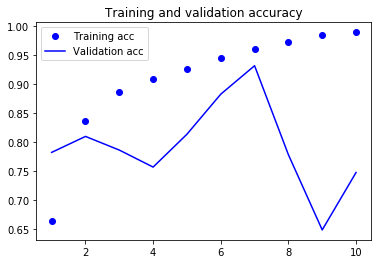

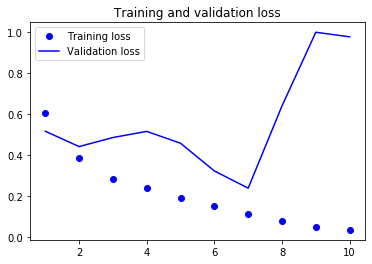

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
model.evaluate(input_test, y_test)

25000/25000 [==============================] - 29s 1ms/sample - loss: 2.1059 - acc: 0.5140


[2.1059396868515017, 0.51396]

In [21]:
# Using LSTM

from tensorflow.keras.layers import LSTM
model_two = Sequential()
model_two.add(Embedding(max_features, 32))
model_two.add(LSTM(32))
model_two.add(Dense(1, activation='sigmoid'))
model_two.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model_two.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.5304 - acc: 0.7372 - val_loss: 2.4914 - val_acc: 0.0636
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3367 - acc: 0.8716 - val_loss: 0.8172 - val_acc: 0.7152
Epoch 3/10
20000/20000 [==============================] - 56s 3ms/sample - loss: 0.2387 - acc: 0.9070 - val_loss: 0.6718 - val_acc: 0.7334
Epoch 4/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.2001 - acc: 0.9258 - val_loss: 0.3283 - val_acc: 0.8686
Epoch 5/10
20000/20000 [==============================] - 57s 3ms/sample - loss: 0.1751 - acc: 0.9354 - val_loss: 1.7887 - val_acc: 0.5660
Epoch 6/10
20000/20000 [==============================] - 60s 3ms/sample - loss: 0.1624 - acc: 0.9416 - val_loss: 0.2136 - val_acc: 0.9164
Epoch 7/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.1367 - acc: 0.9524 - val_loss: 0.8

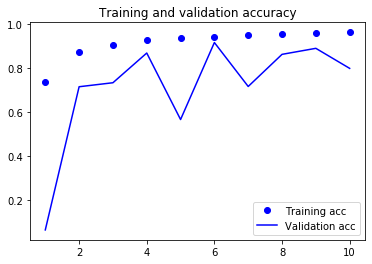

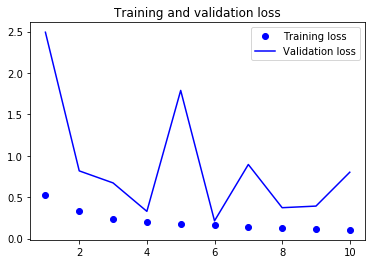

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()